In [3]:
import numpy as np
import functools
import time
from matplotlib import pyplot as plt
from sklearn import datasets

# ECS7023P K-Means Algorithm Elliot Linsey

Below I have created two small datasets and imported the iris dataset from the scikit-learn library. The reason I have created the two datasets is that they have different dimensions, 1D and 2D. This is to make sure that the algorithm works for both 1-dimensional data and multi-dimensional data, as well as for plotting purposes.   

Both the created datasets have 3 clearly defined clusters that are suitable for K-Means clustering. There are no outliers and an equal number of datapoints per cluster which gives it a high potential for effective clustering. The iris dataset has 4 dimensions and 3 different types of iris flower. One of the flower types is clearly separated from the other two, however the other two are harder to differentiate which may affect the ability of the algorithm to effectively cluster them. To plot the iris dataset, we later on use PCA to reduce the dimensions to 2.

In [15]:
data = np.array([[1,5],
                [3,6],
                [4,2],
                [3,7],
                [5,8],
                [25,31],
                [27,33],
                [23,25],
                [31,28],
                [33,31],
                [55,54],
                [59,51],
                [63,65],
                [56,62],
                [61,61]])

data_1d = np.array([1,5,3,2,6,25,26,24,27,28,53,52,50,49,51])
iris = datasets.load_iris()

In [5]:
# def timer(func):
#     @functools.wraps(func)
#     def wrapper_timer(*args, **kwargs):
#         start = time.perf_counter()
#         #'value' is the function being timed
#         value = func(*args, **kwargs)
#         end = time.perf_counter()
#         print(f'Finished {func.__name__!r} in {end-start:.8f} seconds!')
#         return value
#     return wrapper_timer

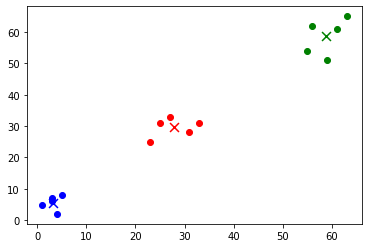

In [6]:
class k_means():
    def __init__(self, data, k):
        self.data = data
        self.k = k
    def ini_centroids(self, data, k):
        lst = []
        data_len = len(self.data)
        choices = np.random.choice(range(data_len), size=self.k, replace=False)
        for i in choices:
            lst.append([self.data[i]])
        #print('centroids = ' + str(lst))
        #print([i[0] for i in lst])
        return [i[0] for i in lst]
    def clusters(self,centroids):
        #print('cluster centroids = ' + str(centroids))
        cluster_vals = [[] for i in range(len(centroids))]
        #print(cluster_vals)
        for y in self.data:
            distances = []
            for x in centroids:
                distances.append(np.linalg.norm(y - x))
            #print(distances)
            idx = distances.index(min(distances))
            #print(idx)
            cluster_vals[idx].append(y)
        for i in range(len(cluster_vals)):
            if len(cluster_vals[i]) == 0:
                cluster_vals[i].append(centroids[i])
        #print(cluster_vals)               
        return cluster_vals
    def update(self,clust_vals):
        cluster_means = []
        for x in clust_vals:
            cluster_means.append(sum(x[::])/len(x))
            #print('x = ' + str(x))
        #print('means = ' + str(cluster_means))
        return self.clusters(cluster_means)
    #@timer
    def k_means_func(self):
        centroids = self.ini_centroids(self.data, self.k)
        cluster_values = self.clusters(centroids)
        updates = self.update(cluster_values)
        count = 0
        for i in range(len(updates)):
            if not np.array_equal(np.round(updates[i][0],3), np.round(self.update(updates)[i][0],3)):
                count += 1
                updates = self.update(updates)
                #print(updates)
        #print('It took ' + str(count) + ' cycles!')
        return updates
    def k_means_repeat(self):
        clusters = []
        variances = []
        for r in range(10):
            clusters.append(self.k_means_func())
        for x in clusters:
            count = 0
            for i in range(self.k):
                count += np.var(x[i])
                #print(np.var(x[i]))
            #print(count)
            variances.append(count)
        #print(variances)
        return clusters[variances.index(np.min(variances))]
    def plot(self):
        test_plot = self.k_means_func()
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print('test array = ' + str(np.mean(test_array[0][:,0])))
        colors = ['red','green','blue','purple','orange','brown','pink','olive','cyan','gray']
        for i in range(self.k):
            plt.scatter(test_array[i][:,0], test_array[i][:,1], color = colors[i])
            plt.scatter(np.mean(test_array[i][:,0]), np.mean(test_array[i][:,1]), marker='x', s=80, color=colors[i])
        return plt.show()
    def plot_2(self):
        test_plot = self.k_means_repeat()
        #print(test_plot)
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print(test_array)
        colors = ['red','green','blue','purple','orange','brown','pink','olive','cyan','gray']
        if self.data.ndim != 1:
            for i in range(self.k):
                plt.scatter(test_array[i][:,0], test_array[i][:,1], color = colors[i])
                plt.scatter(np.mean(test_array[i][:,0]), np.mean(test_array[i][:,1]), marker='x', s=80, color=colors[i])
        else:
            for i in range(self.k):
                plt.plot(test_plot[i], [0]*len(test_plot[i]), 'o',color = colors[i])
                plt.plot(np.mean(test_plot[i]), [0],'x', markersize=15,color = colors[i])
        return plt.show()
        
test = k_means(data, 3)    
#test.k_means_repeat()

test.plot_2()

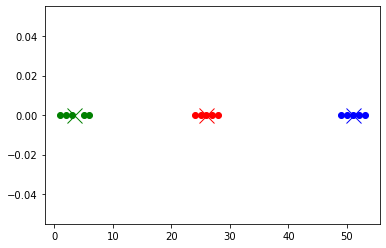

[[25, 26, 24, 27, 28], [53, 52, 50, 49, 51], [1, 5, 3, 2, 6]]

In [16]:
one_d = k_means(data_1d,3)
one_d.plot_2()
one_d.k_means_repeat()

In [10]:
from sklearn.decomposition import PCA
import pandas as pd
numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(iris['data'])

projected = pca.transform(iris['data'])
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(0,len(iris['data'])))
projected

,pc1,pc2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


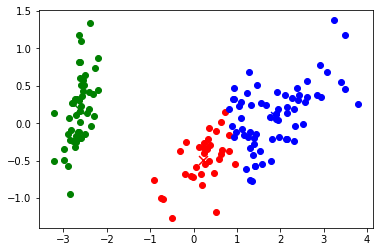

In [14]:
projected_np = projected.to_numpy()
projected_np
projected_k = k_means(projected_np,3)
projected_k.plot_2()
